# 4_analysis.ipynb

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from linearmodels import PanelOLS
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bunmd2_male_CLEAN = pd.read_csv(os.getcwd() + '/data/bunmd2_male_CLEAN.csv')

bunmd2_male_CLEAN.shape

/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(8504384, 95)

In [3]:
male = bunmd2_male_CLEAN[bunmd2_male_CLEAN['byear'] > 1895]
male = male.set_index(['BPL_int', 'byear'])

In [4]:
male2 = male[['pastyearx_AVG', 'year1x_AVG', 'year2x_AVG', 'year3x_AVG', 'year4x_AVG', 'bmonth']]
male2 = pd.get_dummies(male2, columns=['bmonth']).drop(columns = 'bmonth_1.0')

In [5]:
FE = PanelOLS(male.death_age , male2,
              entity_effects = True,
              time_effects=True,
              weights= male.weight
              )
            
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             # cluster_time=True
             )

result

Dep. Variable:,death_age,R-squared:,0.0019
Estimator:,PanelOLS,R-squared (Between):,-0.0685
No. Observations:,8501831,R-squared (Within):,0.0017
Date:,"Mon, Mar 21 2022",R-squared (Overall):,-0.0680
Time:,12:15:50,Log-likelihood,-2.486e+07
Cov. Estimator:,Clustered,,
,,F-statistic:,1016.2
Entities:,49,P-value,0.0000
Avg Obs:,1.735e+05,Distribution:,"F(16,8501722)"
Min Obs:,1621.0,,
Max Obs:,7.444e+05,F-statistic (robust):,2186.9


<AxesSubplot:>

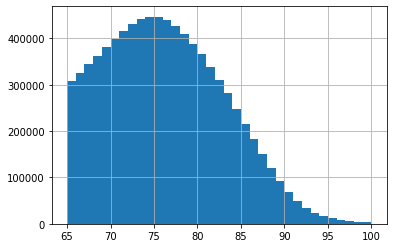

In [6]:
male.death_age.hist(bins = 35)